In [1]:
import MySQLdb
conn=MySQLdb.connect(host="localhost", port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('select * from ontime limit 5')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(2008, 1, 3, 4, 2003, 1955, 2211, 2225, 'WN', 335, 'N712SW', 128, 150, 116, -14, 8, 'IAD', 'TPA', 810, 4, 8, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 754, 735, 1002, 1000, 'WN', 3231, 'N772SW', 128, 145, 113, 2, 19, 'IAD', 'TPA', 810, 5, 10, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 628, 620, 804, 750, 'WN', 448, 'N428WN', 96, 90, 76, 14, 8, 'IND', 'BWI', 515, 3, 17, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 926, 930, 1054, 1100, 'WN', 1746, 'N612SW', 88, 90, 78, -6, -4, 'IND', 'BWI', 515, 3, 7, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 1829, 1755, 1959, 1925, 'WN', 3920, 'N464WN', 90, 90, 77, 34, 34, 'IND', 'BWI', 515, 3, 10, 0, '', '0', 2, 0, 0, 0, 32)


In [3]:
import MySQLdb
conn=MySQLdb.connect(host="localhost", port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('select uniquecarrier, avg(depdelay) from ontime group by uniquecarrier')
rows=cursor.fetchall()
for row in rows:
    print('{}\t{}'.format(row[0],row[1]))

cursor.close()
conn.close()

WN	10.2763
XE	11.0937
YV	11.5720
OH	11.1605
OO	7.2953
UA	13.7844
US	5.6355
DL	7.8880
EV	11.7114
F9	5.9011
FL	9.1839
HA	0.4511
MQ	10.2998
NW	6.4098
9E	6.5856
AA	12.8999
AQ	-1.3903
AS	6.7527
B6	12.4477
CO	13.0236


In [5]:
import MySQLdb
conn=MySQLdb.connect(host="localhost", port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('''select a.uniquecarrier, c.description ,COUNT(*) 
FROM ontime a,carrier c
WHERE a.uniquecarrier=c.code AND a.arrdelay > 0
GROUP BY a.uniquecarrier,c.description
ORDER BY COUNT(*)''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('AQ', 'Aloha Airlines Inc.', 1908)
('HA', 'Hawaiian Airlines Inc.', 18736)
('F9', 'Frontier Airlines Inc.', 46836)
('AS', 'Alaska Airlines Inc.', 62241)
('B6', 'JetBlue Airways', 83202)
('9E', 'Pinnacle Airlines Inc.', 90601)
('OH', 'Comair Inc.', 96154)
('YV', 'Mesa Airlines Inc.', 111004)
('FL', 'AirTran Airways Corporation', 117632)
('EV', 'Atlantic Southeast Airlines', 122751)
('CO', 'Continental Air Lines Inc.', 141680)
('NW', 'Northwest Airlines Inc.', 158797)
('XE', 'Expressjet Airlines Inc.', 162602)
('US', 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)', 167945)
('UA', 'United Air Lines Inc.', 200470)
('MQ', 'American Eagle Airlines Inc.', 205765)
('DL', 'Delta Air Lines Inc.', 209018)
('OO', 'Skywest Airlines Inc.', 219367)
('AA', 'American Airlines Inc.', 293277)
('WN', 'Southwest Airlines Co.', 469518)


In [6]:
import MySQLdb
conn=MySQLdb.connect(host="localhost", port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('''select month, count(*) from ontime 
where year=2008 and arrdelay > 0
group by month''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 279427)
(2, 278902)
(3, 294556)
(4, 256142)
(5, 254673)
(6, 295897)
(7, 264630)
(8, 239737)
(9, 169959)
(10, 183582)
(11, 181506)
(12, 280493)


In [7]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


<BarContainer object of 12 artists>

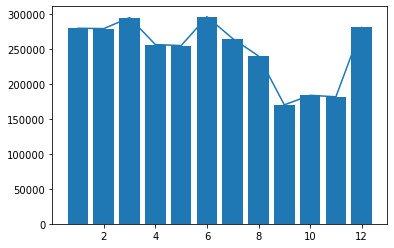

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)

In [9]:
import MySQLdb
conn=MySQLdb.connect(host="localhost", port=3306, db='ontime',user='web',passwd='1234')
cursor=conn.cursor()
cursor.execute('''select dayofweek, avg(arrdelay) from ontime 
where year=2008 and arrdelay > 0
group by dayofweek
order by dayofweek''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, Decimal('31.8789'))
(2, Decimal('32.3587'))
(3, Decimal('30.0503'))
(4, Decimal('30.9361'))
(5, Decimal('33.7131'))
(6, Decimal('31.0378'))
(7, Decimal('34.8987'))


In [10]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[Decimal('31.8789'), Decimal('32.3587'), Decimal('30.0503'), Decimal('30.9361'), Decimal('33.7131'), Decimal('31.0378'), Decimal('34.8987')]


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

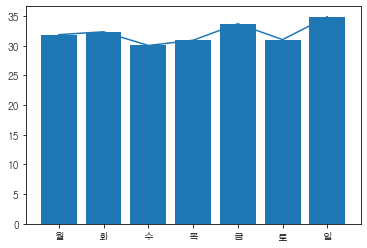

In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font',family=font_name)

plt.plot(x,y)
plt.bar(x,y)
plt.xticks(rotation=0)

In [13]:
import MySQLdb
conn=MySQLdb.connect(host="localhost", port=3306, db='ontime',user='web',passwd='1234')

cursor=conn.cursor()
cursor.execute('''select CRSDepTime, avg(arrdelay) arrdelay from ontime
where month=10 and dayofweek=1
group by CRSDepTime
order by avg(arrdelay)
limit 1''')
rows=cursor.fetchone()
for row in rows:
    print(row)

cursor.close()
conn.close()

2202
-28.0000
